In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img

In [54]:

data_loc = "archive copy/"

In [55]:
count_img = len(list(glob(data_loc + '/*/*.png')))
print(count_img)

2188


In [56]:
Class_num = len(glob(data_loc + "/*"))
print("Number Of Class: ", Class_num)

Number Of Class:  3


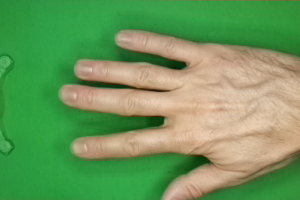

In [59]:
paper = list(glob(data_loc + "/paper/*"))
PIL.Image.open(str(paper[1]))

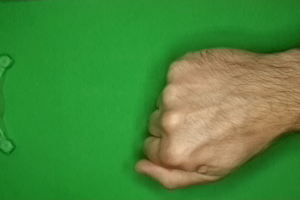

In [60]:
rock = list(glob(data_loc + "/rock/*"))
PIL.Image.open(str(rock[4]))

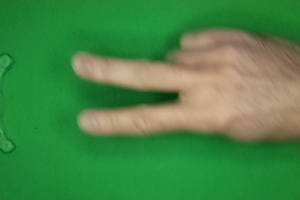

In [61]:
sci = list(glob(train_loc + "/scissors/*"))
PIL.Image.open(str(sci[3]))

In [51]:
batch_size = 32
img_height = 180
img_width = 180

In [52]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_loc,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2188 files belonging to 3 classes.
Using 1751 files for training.


In [53]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_loc,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


In [62]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

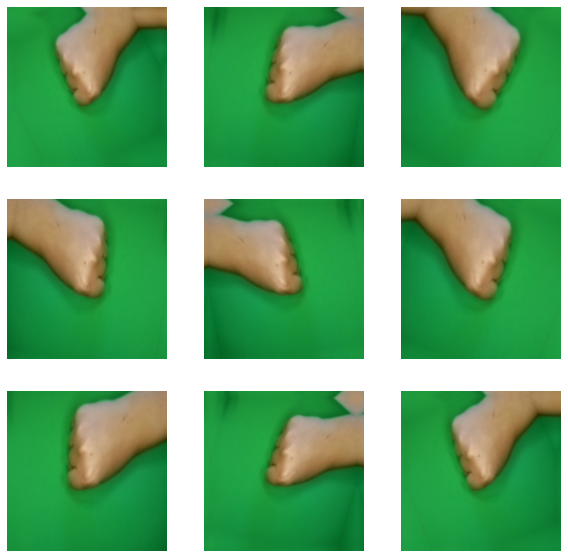

In [63]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")